In [1]:
___Author___='LumberJack Jyss'

In [2]:
print('Global Optimized LumberJack Equities Method\n°OoO_FOREX_Oo0°\nLumberJack Jyss 5779(c)')

Global Optimized LumberJack Equities Method
°OoO_FOREX_Oo0°
LumberJack Jyss 5779(c)


currencies = ['EURJPY=X', 'GBPJPY=X', 'USDJPY=X','GBPUSD=X','BTCUSD=X','ETHUSD=X','GBPEUR=X',\
             'GBPSGD=X','GBPSEK=X','GBPSAR=X','CADUSD=X','CADJPY=X','AUDUSD=X','NZDUSD=X',\
             'NZDGBP=X','NZDEUR=X','AUDGBP=X','AUDEUR=X',]
daily_currency_prices = YahooFinancials(currencies).get_historical_price_data(start,end,'daily')
temp_df = pd.DataFrame.from_dict(daily_currency_prices.values()).T

In [3]:
print('Importing librairies...')
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense
from yahoofinancials import YahooFinancials
print('Librairies imported')

Importing librairies...


Using TensorFlow backend.


Librairies imported


In [4]:
start = '2014-05-29'
end = '2019-05-24'

In [5]:
currencies = ['GBPUSD=X']
daily_currency_prices = YahooFinancials(currencies).get_historical_price_data(start,end,'daily')

In [6]:
vix = web.DataReader('^VIX','yahoo',start,end)

In [7]:
temp_df = pd.DataFrame.from_dict(daily_currency_prices.values()).T

In [8]:
gbpusd = pd.DataFrame.from_dict(temp_df.iloc[4,0])

In [9]:
vix.shape,gbpusd.shape

((1257, 6), (1302, 8))

In [61]:
df = pd.DataFrame()
df['Date'] = gbpusd['formatted_date']
df['High'] = gbpusd['high']
df['Low'] = gbpusd['low']
df['Open'] = gbpusd['open']
df['Close'] = gbpusd['close']
#df['Volume'] = gbpusd['volume']
df['Adj Close'] = gbpusd['adjclose']

In [62]:
delta = round(df.shape[0])
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("Période d'étude : ",delta)
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' jours \nBloc 2 :',bloc2,' jours')

Période d'étude :  1389
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  1111  jours 
Bloc 2 : 278  jours


In [63]:
date = df['Date']

In [64]:
vix = vix.iloc[:-1,:]

In [65]:
df.head()

,Date,High,Low,Open,Close,Adj Close
0,2014-01-28,1.662124,1.654287,1.657523,1.657495,1.657495
1,2014-01-29,1.660550,1.652892,1.656891,1.657001,1.657001
2,2014-01-30,1.656589,1.644899,1.655821,1.655903,1.655903
3,2014-01-31,1.649947,1.643169,1.649430,1.649838,1.649838
4,2014-02-03,1.643791,1.632706,1.643791,1.643791,1.643791


In [66]:
df.tail()

,Date,High,Low,Open,Close,Adj Close
1384,2019-05-19,1.275754,1.271682,1.273026,1.273156,1.273156
1385,2019-05-20,1.279427,1.268617,1.272783,1.272912,1.272912
1386,2019-05-21,NaN,NaN,NaN,NaN,NaN
1387,2019-05-22,1.268343,1.260589,1.266336,1.266416,1.266416
1388,2019-05-23,1.271715,1.264942,1.266464,1.266464,1.266464


In [67]:
vix.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-17,16.809999,14.86,15.89,15.960000,0,15.960000
2019-05-20,17.629999,15.46,15.88,16.309999,0,16.309999
2019-05-21,16.219999,14.79,15.86,14.950000,0,14.950000
2019-05-22,15.440000,14.42,15.06,14.750000,0,14.750000
2019-05-23,18.049999,15.28,15.93,16.920000,0,16.920000


In [68]:
vix.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [69]:
df.shape,vix.shape

((1389, 6), (1340, 6))

In [70]:
temp = pd.DataFrame()
temp = vix.iloc[:,-1]

In [71]:
dataset = df.copy()
dataset = dataset.iloc[-vix.shape[0]:,:]
dataset['Vix'] = np.array(temp)
dataset = dataset.drop(dataset[['Close','Date']],axis=1)
dataset.rename(columns={'Adj Close':'Close'}, inplace=True)
dataset.fillna(dataset.mean(), inplace=True)

In [72]:
dataset.isnull().sum(),type(dataset)

(High     0
 Low      0
 Open     0
 Close    0
 Vix      0
 dtype: int64, pandas.core.frame.DataFrame)

In [73]:
dataset.describe()

,High,Low,Open,Close,Vix
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,1.414989,1.405157,1.410239,1.410265,14.962022
std,0.136958,0.137375,0.137210,0.137209,4.196764
min,1.208751,1.199515,1.203746,1.203935,9.140000
25%,1.302923,1.293975,1.298271,1.298183,12.130000
50%,1.359860,1.350503,1.355748,1.355813,13.875000
75%,1.530737,1.520346,1.525675,1.525815,16.522501
max,1.718715,1.714237,1.716237,1.716090,40.740002


In [74]:
temp = dataset.copy()
dataset = pd.DataFrame()
dataset['Open'] = temp['Open']
dataset['Vix'] = temp['Vix']
dataset['Close'] = temp['Close']
dataset.reset_index(inplace=True,drop=True)
dataset = dataset.iloc[:-1,:]
dataset.tail()

,Open,Vix,Close
1334,1.279787,15.290000,1.279771
1335,1.273026,15.960000,1.273156
1336,1.272783,16.309999,1.272912
1337,1.410239,14.950000,1.410265
1338,1.266336,14.750000,1.266416


In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 3 columns):
Open     1339 non-null float64
Vix      1339 non-null float64
Close    1339 non-null float64
dtypes: float64(3)
memory usage: 31.5 KB


In [76]:
# convert into input/output
X1 = dataset['Open'].values.reshape(len(dataset),1)
X2 = dataset['Vix'].values.reshape(len(dataset),1)
y = dataset['Close'].values.reshape(len(dataset),1)


In [77]:
len(X1),len(X2)

(1339, 1339)

In [78]:
X = np.concatenate((X1,X2),axis=1)

In [79]:
# first input model
model = Sequential()
model.add(Dense(50, activation='relu', input_dim=2))
#model.add(Dense(50,activation='tanh'))
#model.add(Dense(25,activation='sigmoid'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [80]:
# fit model
model.fit(X, y, epochs=500, verbose=1)

Epoch 1/500
1339/1339 [==============================] - 0s 150us/step - loss: 1.0576
Epoch 2/500
1339/1339 [==============================] - 0s 28us/step - loss: 0.1805
Epoch 3/500
1339/1339 [==============================] - 0s 26us/step - loss: 0.1615
Epoch 4/500
1339/1339 [==============================] - 0s 26us/step - loss: 0.1463
Epoch 5/500
1339/1339 [==============================] - 0s 25us/step - loss: 0.1337
Epoch 6/500
1339/1339 [==============================] - 0s 23us/step - loss: 0.1171
Epoch 7/500
1339/1339 [==============================] - 0s 25us/step - loss: 0.1028
Epoch 8/500
1339/1339 [==============================] - 0s 25us/step - loss: 0.0884
Epoch 9/500
1339/1339 [==============================] - 0s 25us/step - loss: 0.0760
Epoch 10/500
1339/1339 [==============================] - 0s 25us/step - loss: 0.0646
Epoch 11/500
1339/1339 [==============================] - 0s 24us/step - loss: 0.0536
Epoch 12/500
1339/1339 [==============================] - 0s 2

In [81]:
# demonstrate prediction
x_input = np.array([[df.iloc[-1,5],vix.iloc[-2,5]]])
yhat = model.predict(x_input, verbose=1)
print(yhat,'versus', df.iloc[-1,-1])

1/1 [==============================] - 0s 26ms/step
[[1.2660689]] versus 1.2664639949798584


In [83]:
dataset.tail()

,Open,Vix,Close
1334,1.279787,15.290000,1.279771
1335,1.273026,15.960000,1.273156
1336,1.272783,16.309999,1.272912
1337,1.410239,14.950000,1.410265
1338,1.266336,14.750000,1.266416


In [92]:
predictions = []
print('Initializing \b Processing')
for i in range (1, len(dataset)):
    x_input = np.array([[dataset.iloc[i,0],dataset.iloc[i-1,1]]])
    yhat = model.predict(x_input, verbose=0)
    yhat = yhat.reshape(1,)
    predictions.append(yhat)
    if round(i/(len(dataset)),3) == 0.10 and round(i/(len(dataset)),1) < 0.101:
          print('10% completed')
    elif round(i/(len(dataset)),3) == 0.30 and round(i/(len(dataset)),1) < 0.301:
          print('30% completed')
    elif round(i/(len(dataset)),3) == 0.50 and round(i/(len(dataset)),1) < 0.501:
          print('50% completed')
    elif round(i/(len(dataset)),3) == 0.70 and round(i/(len(dataset)),1) < 0.701:
          print('70% completed')
print('All processed')

Initializing Processing
10% completed
30% completed
50% completed
50% completed
70% completed
All processed


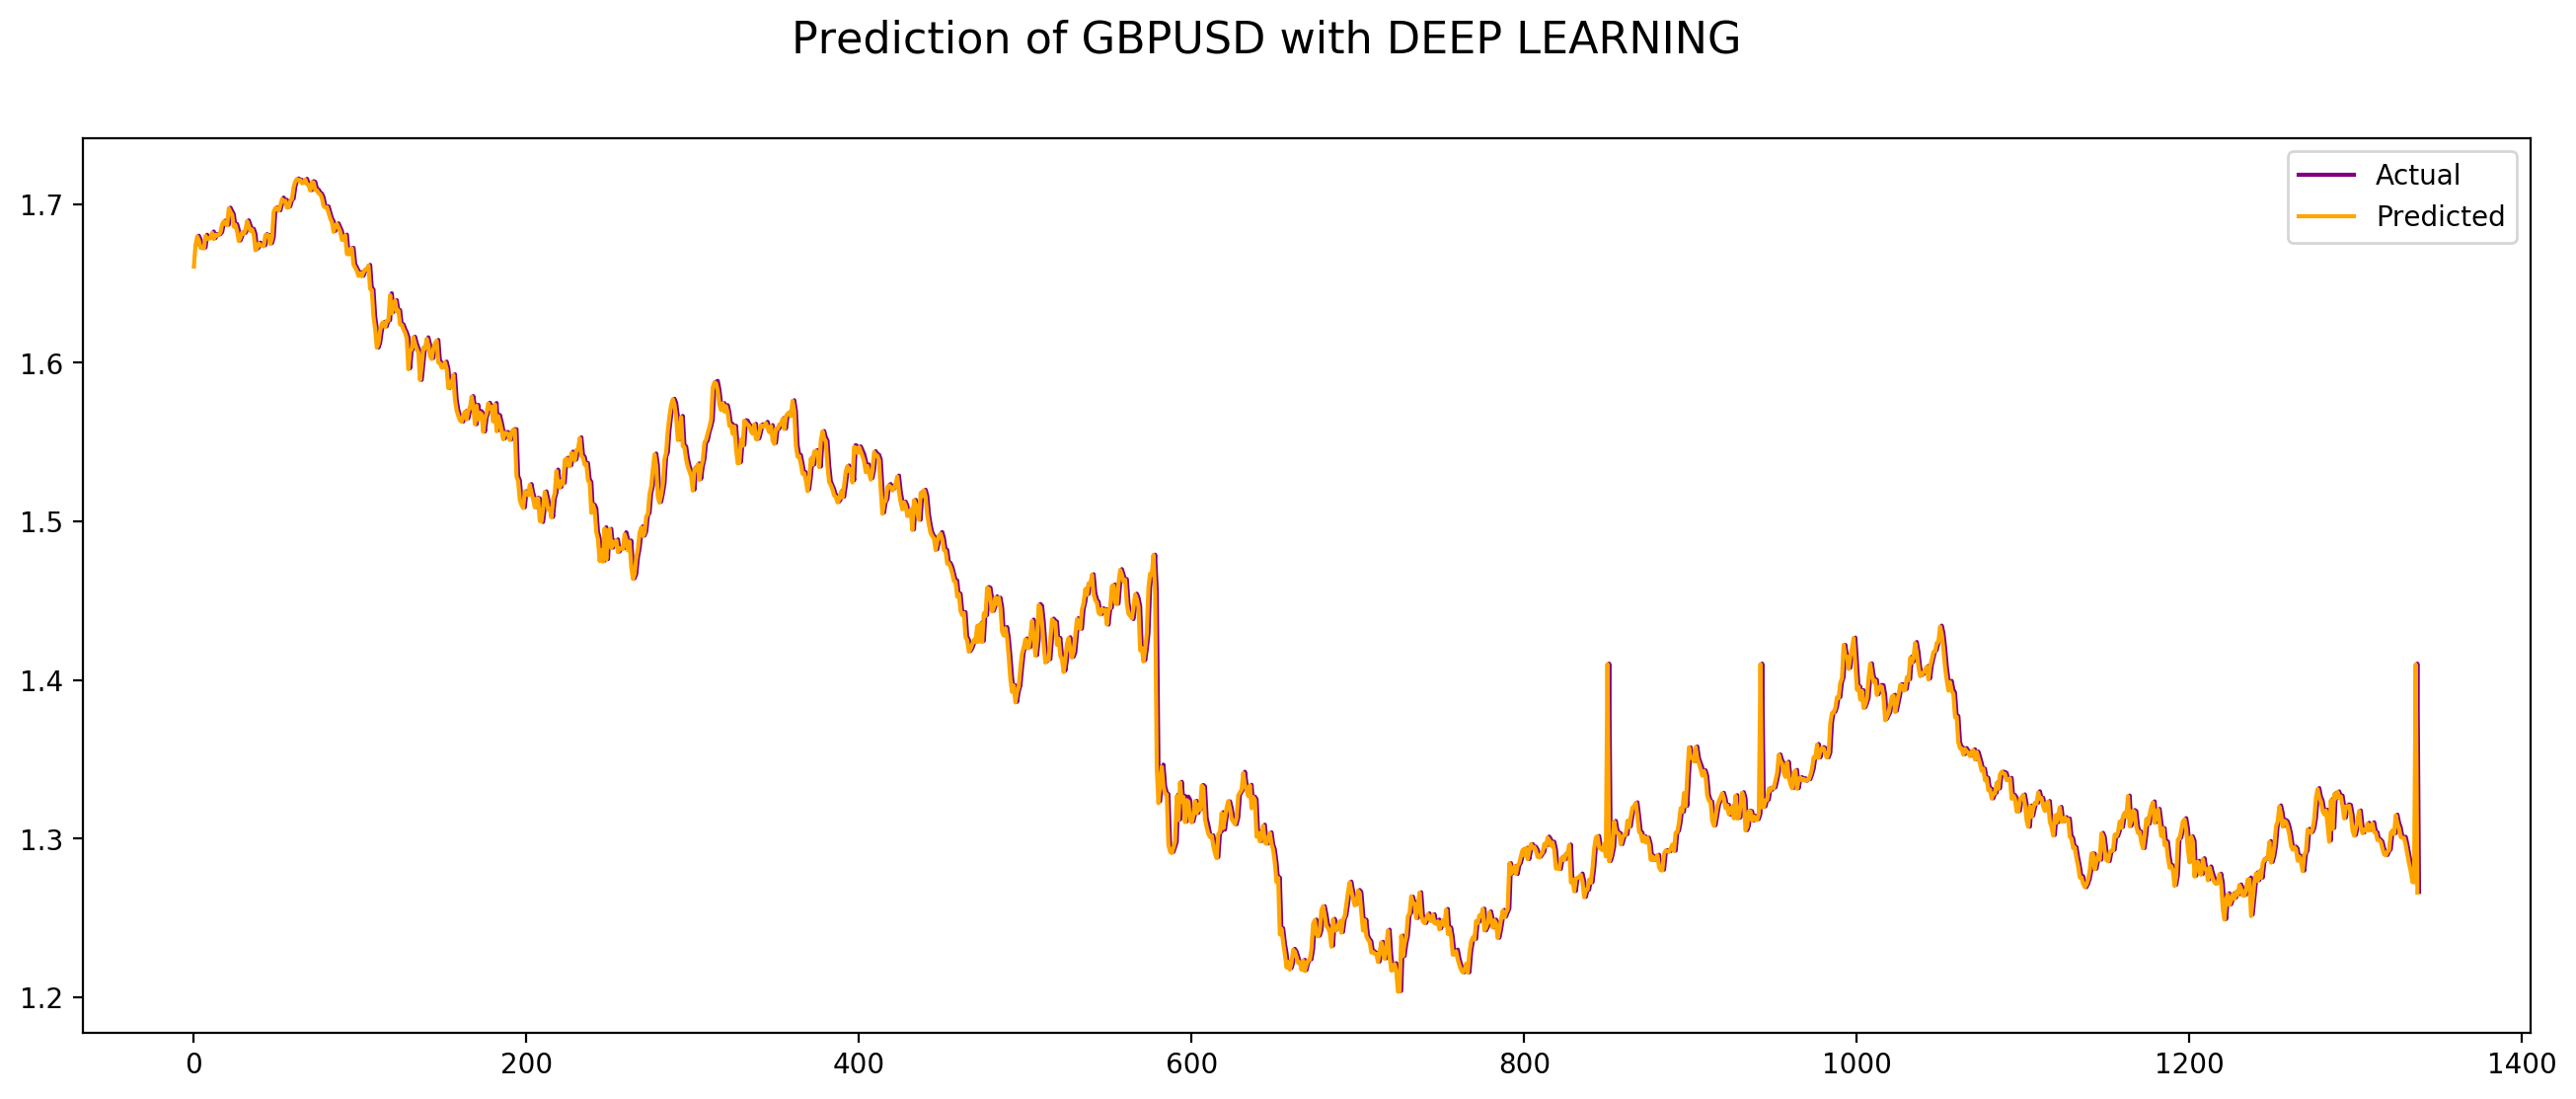

In [93]:
plt.figure(figsize=(16,6),dpi=200)
plt.suptitle('Prediction of GBPUSD with DEEP LEARNING',fontsize=16)
plt.plot(dataset.iloc[2:,2],color='purple',label='Actual')
plt.plot(predictions,color='orange',label='Predicted')
plt.legend()
plt.show()

In [94]:
len(dataset),len(predictions),len(df),type(predictions),type(date)

(1339, 1338, 1389, list, pandas.core.series.Series)

In [95]:
index = len(df) - len(predictions)
len(date.iloc[index:])                      

1338

In [96]:
type(date)

pandas.core.series.Series

In [97]:
resultats = date
resultats = resultats.iloc[index:]
resultats.reset_index(inplace=True,drop=True)
dataset.reset_index(inplace=True,drop=True)
resultats = pd.concat((resultats,dataset.iloc[2:,:],pd.Series(predictions)),axis=1)
resultats.iloc[:,4] = resultats.iloc[:,4].shift(1)
resultats['% Error'] = ((resultats.iloc[:,3].values-resultats.iloc[:,4])/resultats.iloc[:,4])*100

In [98]:
resultats.head()

,Date,Open,Vix,Close,0,% Error
0,2014-04-08,NaN,NaN,NaN,NaN,NaN
1,2014-04-09,NaN,NaN,NaN,[1.6605766],[nan]
2,2014-04-10,1.674677,17.290001,1.675014,[1.674136],[0.05242931]
3,2014-04-13,1.680023,18.410000,1.679995,[1.6794825],[0.030492913]
4,2014-04-14,1.677627,21.440001,1.677740,[1.6770574],[0.040687576]


In [99]:
resultats.tail()

,Date,Open,Vix,Close,0,% Error
1334,2019-05-20,1.279787,15.290000,1.279771,[1.2793448],[0.033283878]
1335,2019-05-21,1.273026,15.960000,1.273156,[1.2726152],[0.04246183]
1336,2019-05-22,1.272783,16.309999,1.272912,[1.2723546],[0.043838426]
1337,2019-05-23,1.410239,14.950000,1.410265,[1.4097747],[0.03477916]
1338,NaN,1.266336,14.750000,1.266416,[1.2659355],[0.037949283]
